# **7 Fortune Group**
## Banking Marketing Targets Dataset
https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

## Role

**Data scientist : Membantu team marketing dalam membuat model untuk menentukan targeted user.**

## Stages

Stage 0


1.  Problem Statement
2.  Goal
3.  Objective
4.  Business Metrics

Stage 1


1.   Data Exploration
2.   Exploratory Data Analysis
3.   Business Insights and Visualization

Stage 2


1.   Data Cleansing
2.   Featuring Engineering

Stage 3


1.   Modeling
2.   Evaluation









# **Stage 0**

## Problem Statement

Bank ABC adalah salah satu bank di Portugal yang ingin menawarkan produk deposito berjangka ke nasabahnya. Penawaran tersebut dilakukan secara langsung melalui telepon (telemarketing). Namun, karena cara tersebut membutuhkan banyak waktu dan biaya maka diperlukan identifikasi terlebih dahulu untuk menemukan user yang berpeluang tinggi membuka deposito berjangka sehingga proses telemarketing dapat dilakukan dengan efektif dan efisien.


## Goal

Meningkatkan conversion rate

## Objective

1. Membuat model untuk mendeteksi user-user yang berpotensi membuka rekening deposito berjangka agar user-user tersebut lebih diprioritaskan dalam melakukan telemarketing.
2. Memberikan rekomendasi bisnis dan rekomendasi nasabah yang berpotensi kepada pihak marketing


## Business Metrics

Conversion rate (pembukaan deposito berjangka)


# **Stage 1**

*Deadline 26 Sep - 2 Okt 2022*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import warnings
warnings.filterwarnings("ignore")


# Data Exploration

## Tentang Data

Projek ini menggunakan dua dataset, yaitu:

- train.csv: teridiri dari 45.211 baris dan 17 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
- test.csv: teridiri dari 4521 baris dan 17 kolom, dipilih secara acak dari train.csv

##  Deskripsi Kolom
**Data Klien Bank**
- age: usia (numerikal)
- job: jenis pekerjaan (kategorikal: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: status pernikahan (kategorikal: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: tingkat pendidikan (kategorikal: primary, secondary, tertiary and unknown)
- default: memiliki kredit sebelumnya? (kategorikal: 'no','yes','unknown')
- housing: memiliki cicilan rumah? (kategorikal: 'no','yes','unknown')
- loan: memiliki pinjaman pribadi? (kategorikal: 'no','yes','unknown')
- balance: saldo individual.

## Terkait dengan kontak terakhir dari kampanye saat ini
- contact: jenis komunikasi ketika dihubungi (kategorikal: "unknown","telephone","cellular")
- day: hari atau tanggal terakhir dihubungi (numerikal)
- month: bulan terakhir dihubungi (kategorikal: "jan", "feb", "mar", …, "nov", "dec")
- duration: durasi kontak terakhir, dalam detik (numeric)

## Kolom lainnya
- campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerikal)
- pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerikal, -1 berarti klien belum dihubungi sebelumnya)
- previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerikal)
- poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: "unknown","other","failure","success")

## Variabel Ouput (target yang akan diprediksi):
- y: apakah klien berlangganan deposito berjangka? (biner: "yes","no")

## Load Dataset

In [2]:
## data train
df_train = pd.read_csv('train.csv',sep=';')

In [3]:
df_train.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31691,40,admin.,single,secondary,no,963,yes,no,cellular,7,apr,479,1,-1,0,unknown,no
21599,33,management,married,tertiary,no,801,no,no,cellular,19,aug,133,4,-1,0,unknown,no
32634,39,admin.,married,secondary,no,1408,yes,no,cellular,17,apr,306,1,-1,0,unknown,no
25808,42,technician,married,secondary,no,300,yes,no,cellular,19,nov,76,1,-1,0,unknown,no
32149,34,management,married,tertiary,no,0,no,no,cellular,15,apr,125,2,-1,0,unknown,no


In [4]:
## data test
df_test = pd.read_csv('test.csv',sep=';')

In [5]:
df_test.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
631,33,technician,married,tertiary,no,8023,no,no,cellular,30,nov,107,1,105,3,failure,no
1394,26,technician,single,secondary,no,2610,yes,yes,unknown,2,jun,626,1,-1,0,unknown,no
3687,29,blue-collar,single,secondary,no,770,yes,no,cellular,17,apr,341,1,-1,0,unknown,no
3699,50,blue-collar,married,secondary,no,253,yes,yes,cellular,5,may,475,2,-1,0,unknown,no
4055,29,management,single,tertiary,no,1673,no,no,cellular,16,aug,200,2,159,3,other,no


In [6]:
# dataset size
print('Train data size: ', df_train.shape)
print('Test data size: ', df_test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


# Exploratory Data Analysis

## Statistics Descriptive

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Jumlah Missing Value
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df_train.duplicated().any()

False

In [10]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
#Pemisahan data Yes Dan NO
df_yes=df_train[df_train['y']=='yes']
df_no=df_train[df_train['y']=='no']

In [12]:
#Pemisahan Kolom Berdasarakn Typedata (Numerik & Kategori)
nums=['age','balance','day','duration','campaign','pdays','previous']
cats=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

Catatan : 
1. semua Typedata sesuai
2. Tidak di temukan Missing value/ Data kosong di setiap kolom
3. Tidak di temukan Data Duplikat
4. terdapat imbalance data user yang membuka deposito dan tidak membuka deposito

In [13]:
df_train[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Catatan : 
1. kolom age,day memiliki sedikit persebaran data berbeda dengan kolom balance dan pdays yang memiliki pesebaran data yang besar dan cukup ekstrim
2. perbedaan yang cukup signifikan antara mean/median dengan max mengidikasikan outlier yang juga signifikan 

In [14]:
df_train[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


dari informasi di atas diperoleh bahwa:
1. usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun
2. balance yang palinga banyak ditemukan adalah 0 euro.
3. day atau tanggal paling banyak adalah 20
4. duration yang paling banyak dilakukan adalah 124 detik.
5. jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0


In [15]:
df_train[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


diperoleh bahwa:
1. Ada 12 pekerjaan, blue-collar adalah pekerjaan terbanyak
2. client dengan status sudah menikah merupakan client yang terbanyak
3. kebanyakan pendidikan client dari data adalah secondary
4. default no merupakan data dari default yang kebanyakan ditemukan pada client
5. kebanyakan client mempunyai rumah
6. client dengan tidak adanya pinjaman merupakan client yang terbanyak.
7. client sering dihubungi melalui cellular
8. data month yang paling banyak adalah may
9. poutcome yang paling banyak ditemukan adalah unknown
10. nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito



In [16]:
for col in nums:
    print(f'''Data Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom age:
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

Data Value count kolom balance:
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

Data Value count kolom day:
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Data Value count kolom duration:
124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 15

In [17]:
for col in cats:
    print(f'''Data Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Data Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Data Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Data Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Data Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Data Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Data Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Data Value count kolom month:
may    13766
jul     689


Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:  
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?  
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?  
C. Apakah ada kolom yang memiliki nilai summary agak aneh?  
(min/mean/median/max/unique/top/freq)

### Jawaban
A. Semua tipe data sudah sesuai  
B. Tidak ada kolom yang memiliki nilai kosong  
C. Terdapat kolom yang agak aneh karena memiliki nilai standard deviasi yang sangat tinggi yaitu pada kolom 'balance'

## Univariate Analysis

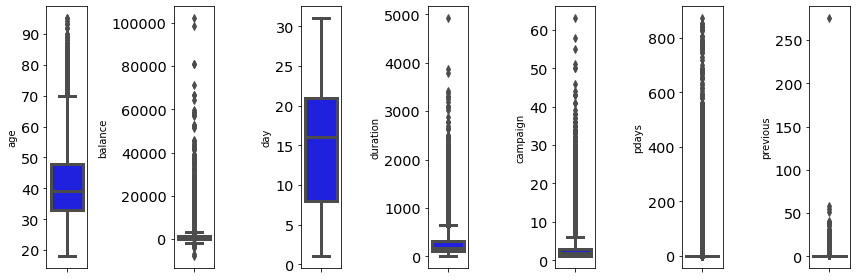

In [18]:
# Univariate analysis terhadap kolom numerikal menggunakan boxplot
for i in range(0, len(nums)):
  plt.subplot(1,len(nums),i+1)
  sns.boxplot(y=df_train[nums[i]], color='blue', orient='v')
  plt.tight_layout();

diperoleh bahwa:
1. Pada kelompok numerikal, hampir semua kolom memiliki banyak outlier.
2. Pada kolom age tidak terlalu bermasalah karena hanya sebagian kecil saja yang menjadi outlier.
3. Pada kolom balance, duration, campaign didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
4. Pada kolom day tidak ada masalah.
5. Pada kolom pdays memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 19%.
6. Pada kolom previous memiliki 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh)
7. Yang perlu di follow up saat data pre-processing dapat melakukan standarisasi ataupun normalisasi.

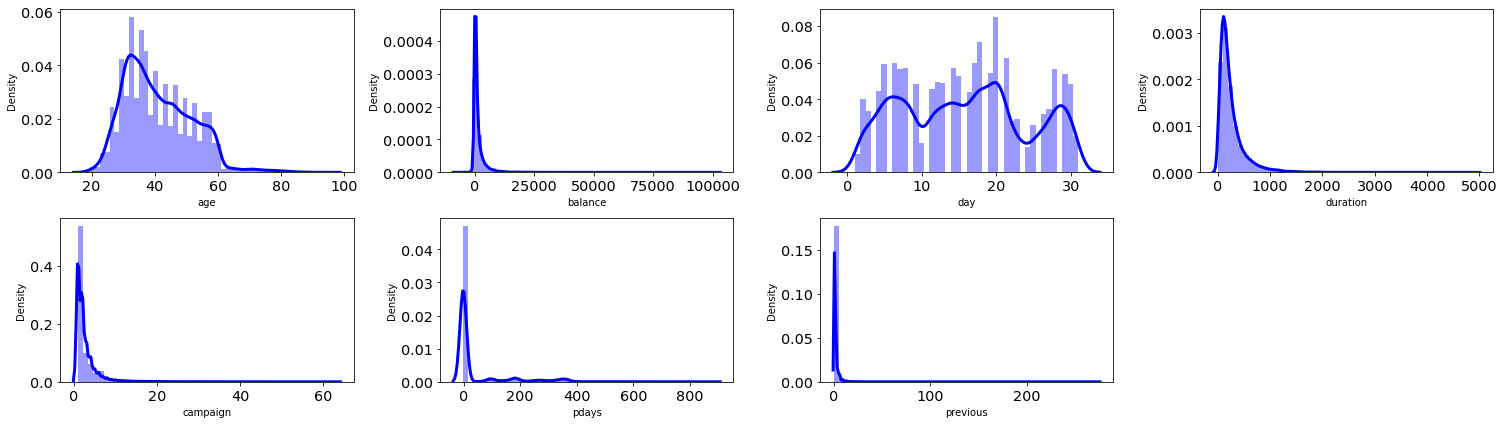

In [19]:
# # Univariate analysis terhadap kolom numerikal menggunakan distplot
plt.figure(figsize=(21, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_train[nums[i]], color='blue');
    plt.tight_layout()

In [20]:
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df_train[nums].columns[i]} : {df_train[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


Catatan :
1. Dari nilai skewness dan visualisasi di atas dapat dikatakan bahwa tipe data numerikal memiliki pola persebaran datanya adalah skew postif dimana nilai mean lebih besar dari pada median, kecuali data day yang hampir menyerupai distribusi normal.
2. Lonjakan pada gambar diatas menunjukkan jumlah yang paling dominan untuk setiap data kategorik

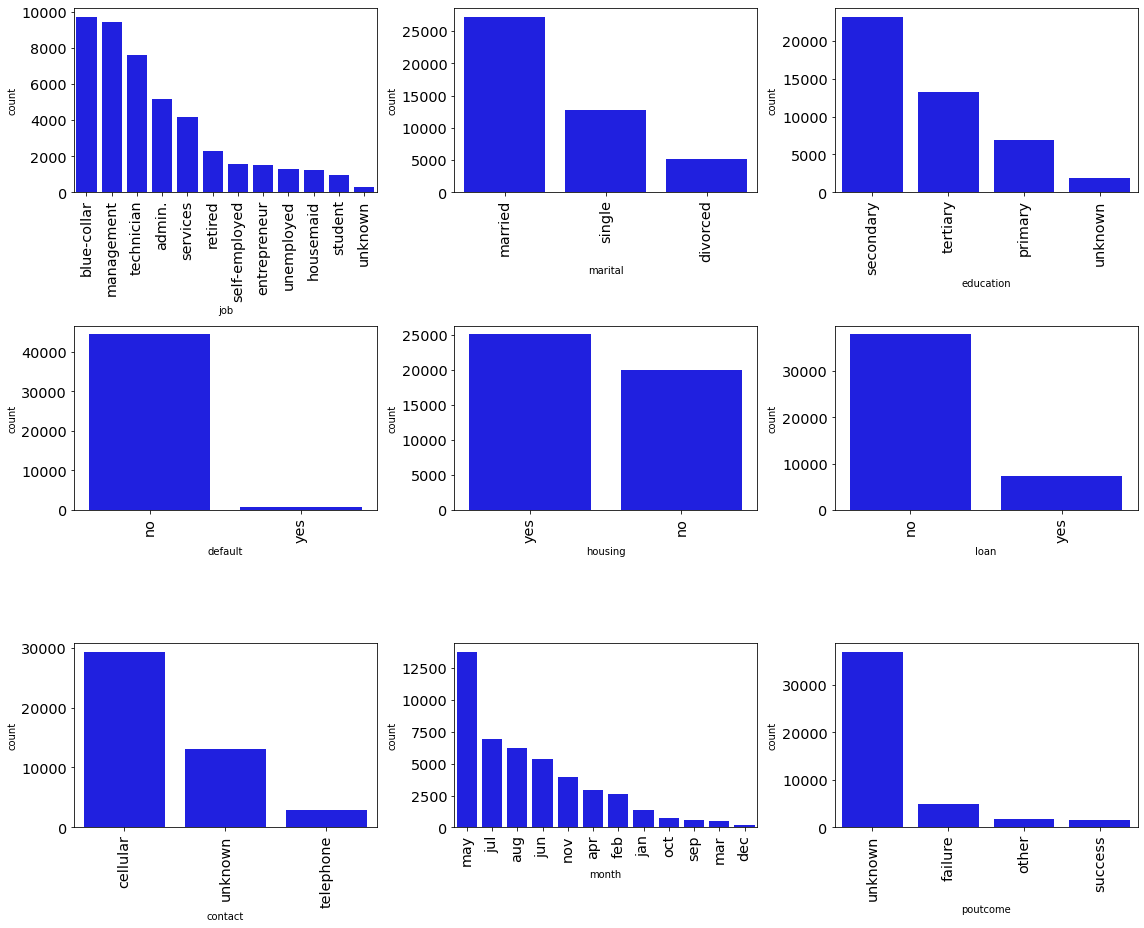

In [24]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cats)-1):
    df=df_train[cats[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df_train[cats[i]],color='blue', orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()


In [25]:
df_train[(df_train['poutcome'] == 'unknown') & (df_train['previous'] != 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no


catatan:  
    1. **Mengubah poutcome pada dataframe diatas sesuai dengan kolom y dengan keterangan failure or success**  
    2. **Mengganti unknown menjadi other**


dari barplot disamping diperoleh bahwa dari keseluruhan data kategorik:
1. klien yang terbanyak berprofesi sebagai management
2. klien dengan status sudah menikah merupakan klien yang terbanyak
3. pendidikan secondary merupakan yang paling banyak
4. default no lebih banyak dibandingkan yes
5. klient yang memiliki rumah lebih banyak daripada yang tidak memiliki rumah
6. klien dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman
7. klien lebih banyak dihubungi melalui cellular daripada telephone dan unknown
8. bulan may merupakan bulan yang paling banyak dilakukan campaign
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah unknown


## Multivariate Analysis

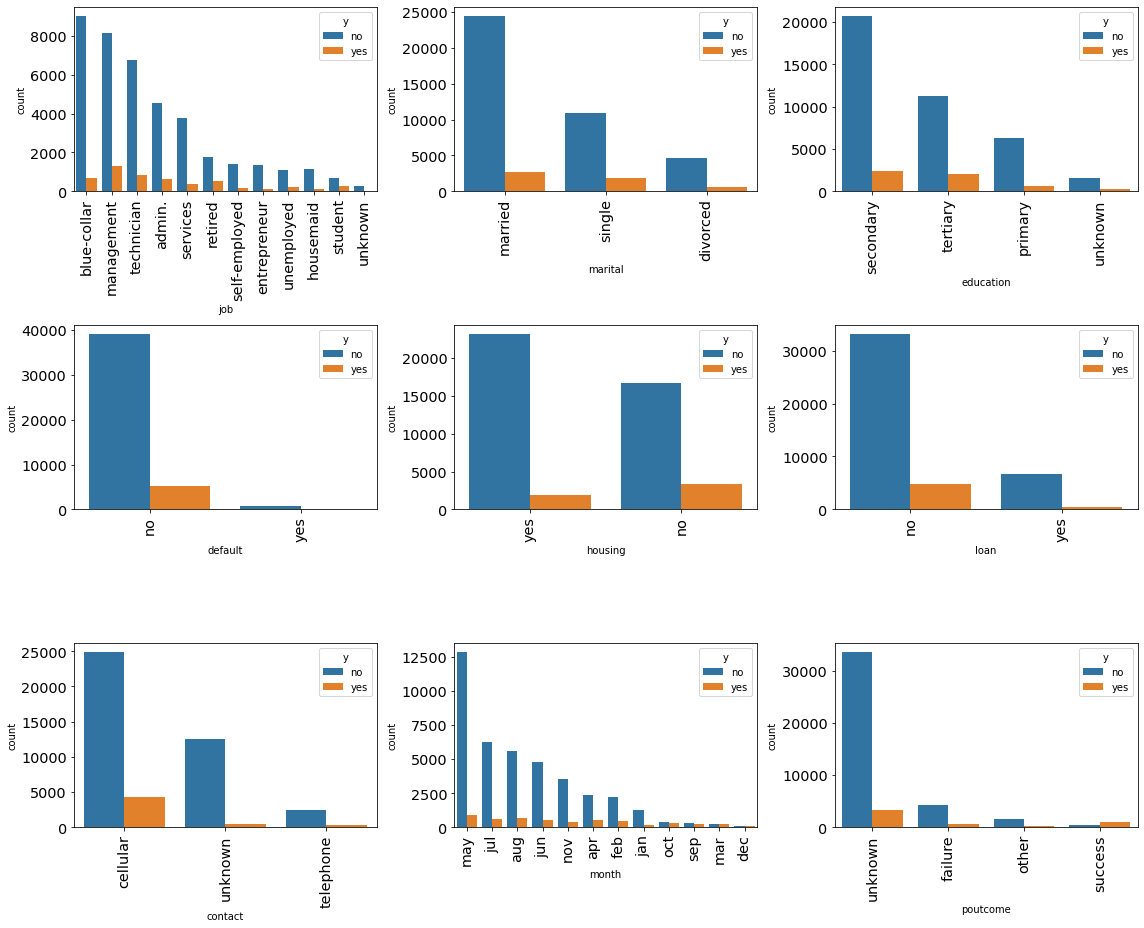

In [25]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cats)-1):
    df=df_train[cats[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df_train[cats[i]],hue=df_train['y'], orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

mengubah 'unknown' menjadi other

In [26]:
for col in cats:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df_train[col].value_counts(), '\n')

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

**Grafik Job**  
Pekerjaan 'blue-collar' memiliki jumlah nasabah yang tidak berlangganan paling tinggi sedangkan pekerjaan 'management' memiliki jumlah nasabah yang berlangganan paling tinggi. Untuk rasio tertinggi antara nasabah yang berlangganan dan tidak ada pada pekerjaan 'student'. Namun, secara keseluruhan nasabah yang tidak berlangganan selalu lebih tinggi dibandingkan nasabah yang berlangganan.

**Grafik Marital**  
Status 'marital' memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi kemudian status 'single' dan 'divorced'

**Grafik Education**  
Pendidikan 'secondary' memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi.

**Grafik Default**  
Nasabah yang belum memiliki kredit sebelumnya memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dibandingkan nasabah yang sudah memiliki kredit sebelumnya.

**Grafik Housing**  
Nasabah yang tidak memiliki cicilan rumah lebih banyak yang berlangganan dibandingkan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Nasabah yang tidak memiliki pinjaman pribadi lebih banyak yang berlangganan dibandingkan nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Nasabah yang dihubungi menggunakan jenis komunikasi 'cellular' memiliki jumlah nasabah yang berlangganan paling banyak dibandingkan jenis komunikasi lain.

**Grafik Month**  
Bulan May memiliki nasabah yang berlangganan dan tidak paling tinggi dibandingkan bulan lainnya.

**Grafik Poutcome**  
Yang mengalami keberhasilan dari kampanye sebelumnya memiliki rasio pembukaan deposito tertinggi.

## 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:  
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?  
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?  
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

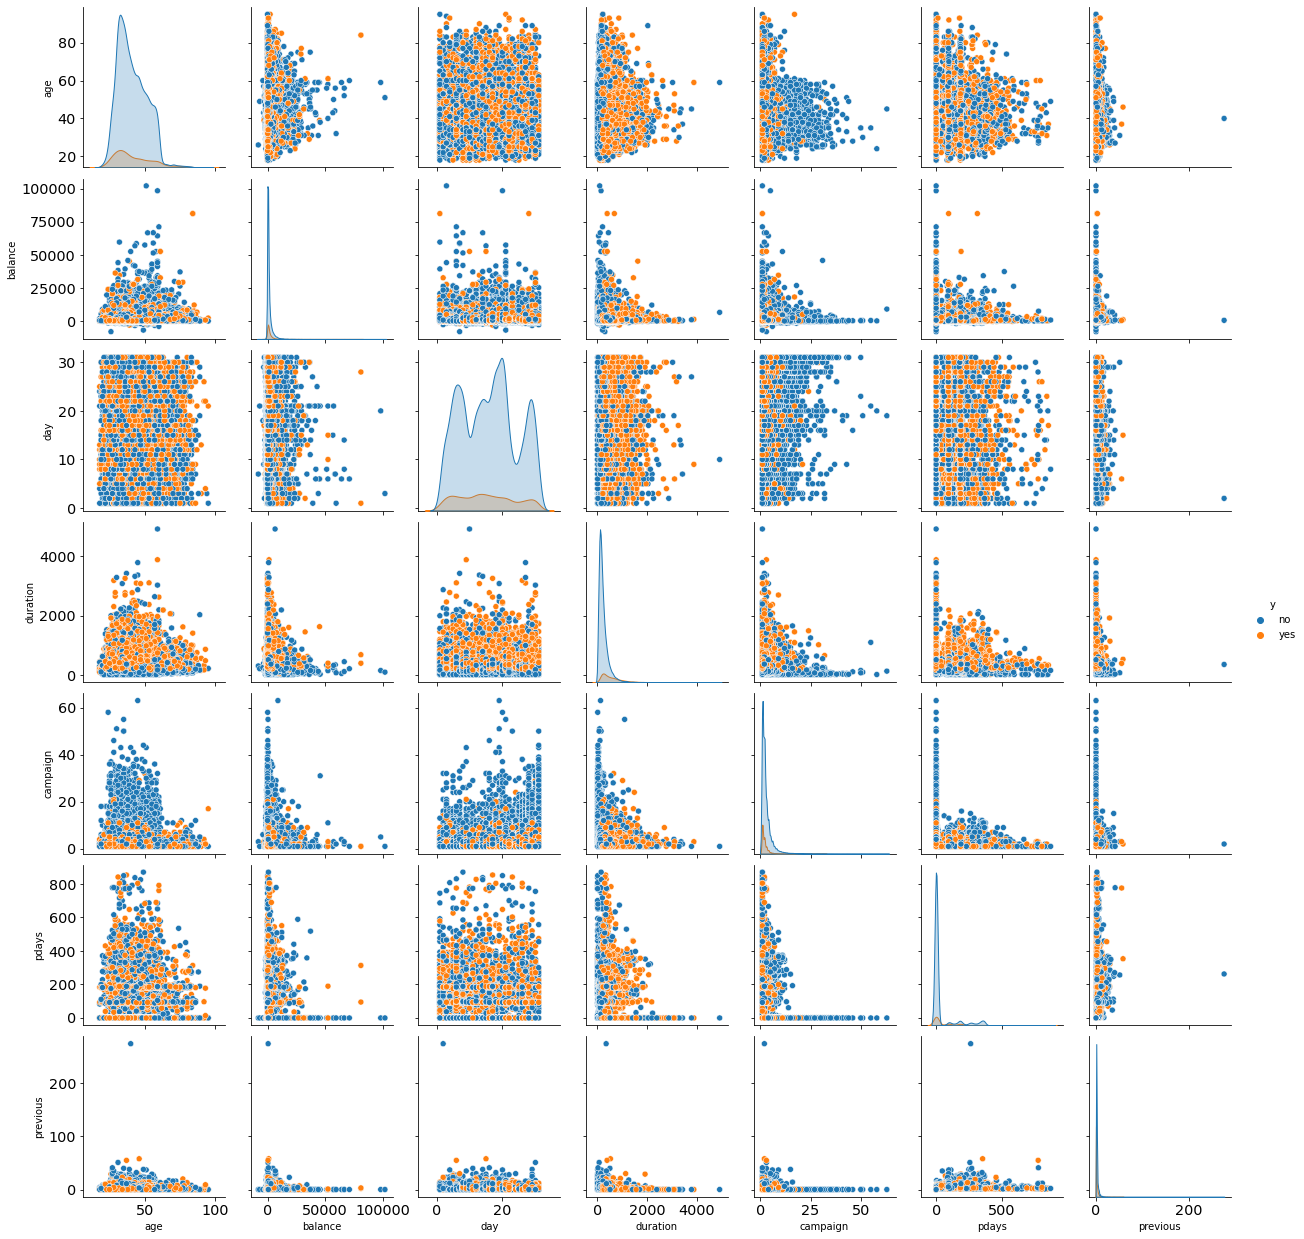

In [27]:
# Multivariate analysis terhadap kolom numerikal menggunakan pairplot
p=sns.pairplot(df_train,hue='y')

A. Korelasi antar feature dan label lemah. Namun, semua feature dapat dimanfaatkan untuk melakukan analisis kecuali feature 'month' dan 'pdays'.



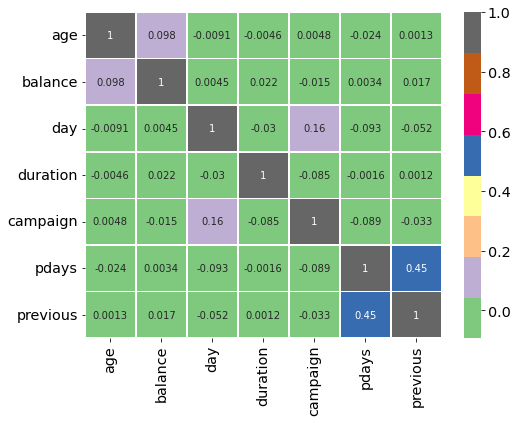

In [27]:
# Multivariate analysis terhadap kolom numerikal menggunakan Heatmap Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(),annot=True,cmap='Accent',linewidths=0.5);

B. Korelasi antar feature kebanyakan lemah kecuali pada korelasi antara feature 'previous' dan 'pdays' yang cukup kuat dengan nilai 0.45. Semua feature dapat dimanfaatkan untuk melakukan analisis. 

# Bussiness Insights and Visualization

In [28]:
df_yes = df_train[df_train['y']=='yes']

In [29]:
df_yes.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [30]:
df_yes[(df_yes['duration'] >= 120) & (df_yes['duration'] <= 540)].count()


age          3001
job          3001
marital      3001
education    3001
default      3001
balance      3001
housing      3001
loan         3001
contact      3001
day          3001
month        3001
duration     3001
campaign     3001
pdays        3001
previous     3001
poutcome     3001
y            3001
dtype: int64

In [31]:
3001/len(df_yes)

0.5674040461334846

### Duration Analysis on Term Deposit Account Subscriptions

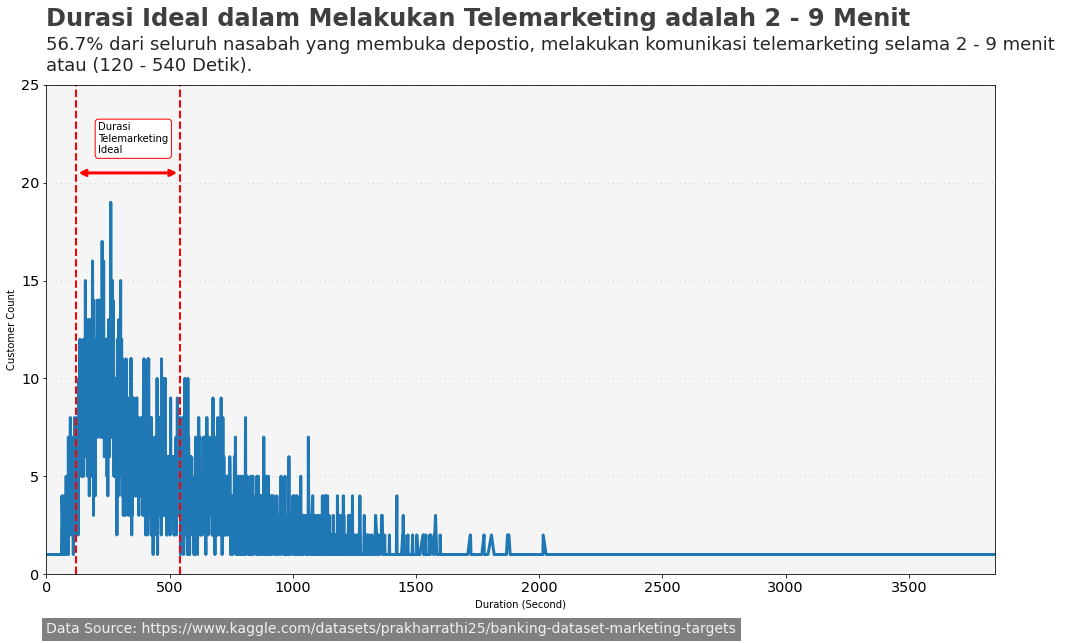

In [32]:
df_plot = df_yes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Duration (Second)')
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = -0.65, y = 28, s = "Durasi Ideal dalam Melakukan Telemarketing adalah 2 - 9 Menit",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7,
               s = '56.7% dari seluruh nasabah yang membuka depostio, melakukan komunikasi telemarketing selama 2 - 9 menit \natau (120 - 540 Detik).',
              fontsize = 18, alpha = .85)
plt.text(x = -0.65, y = -3,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(122, 20.5),
                xytext =(539, 20.5), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 210, y = 21.5,
    s = 'Durasi\nTelemarketing\nIdeal',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
#plt.savefig('bizinsight1.png')
plt.show()


### Number of Contact During this Campaign Analysis on Term Deposit Account Subscriptions

In [33]:
df_yes[(df_yes['campaign'] >= 1) & (df_yes['campaign'] <= 3)].count()

age          4580
job          4580
marital      4580
education    4580
default      4580
balance      4580
housing      4580
loan         4580
contact      4580
day          4580
month        4580
duration     4580
campaign     4580
pdays        4580
previous     4580
poutcome     4580
y            4580
dtype: int64

In [34]:
4580/len(df_yes)

0.8659481943656646

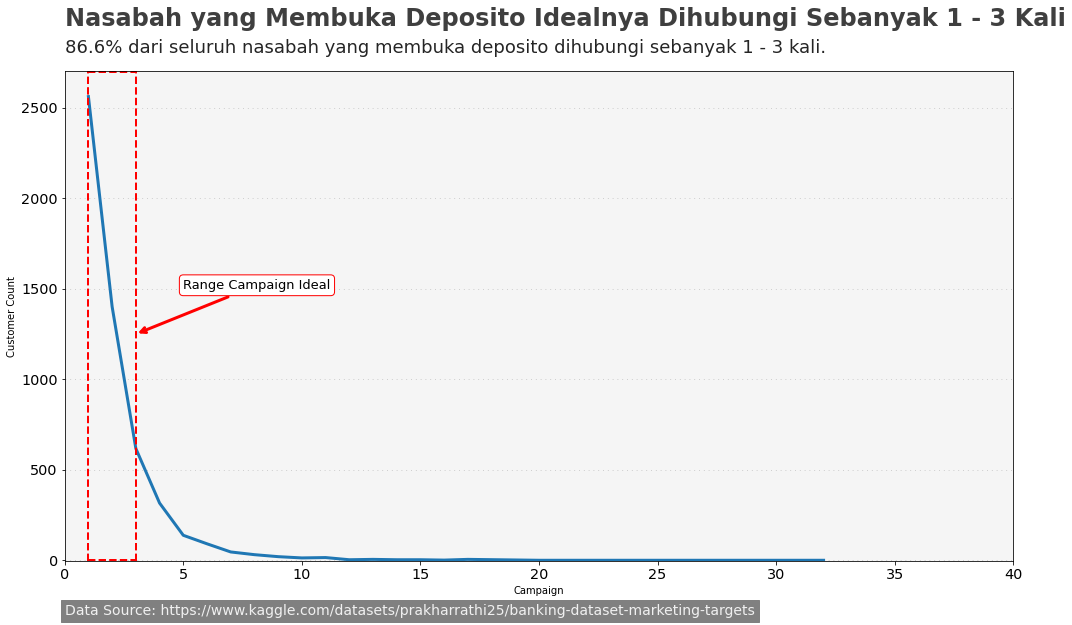

In [35]:
from matplotlib.patches import Rectangle

df_plot = df_yes.groupby('campaign').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='campaign', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Campaign')
plt.axvline(x=1, linewidth=2, color='red', linestyle='--')
plt.axvline(x=3, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=2695, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=0, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 40)
plt.ylim(-1, 2700)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 0, y = 2950, s = "Nasabah yang Membuka Deposito Idealnya Dihubungi Sebanyak 1 - 3 Kali",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 2800,
               s = '86.6% dari seluruh nasabah yang membuka deposito dihubungi sebanyak 1 - 3 kali.',
              fontsize = 18, alpha = .85)
plt.text(x = 0, y = -300,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('Range Campaign Ideal', xy =(3, 1250),
                xytext =(5, 1500), 
                arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13, bbox = dict(boxstyle ="round", fc ="1", color='r'))


# plt.text(x = -0.65, y = 21.5,
#     s = 'Ideal\nTelemarketing\nDuration',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
# plt.savefig('bizinsight2.png')
plt.show()

### Customer Age Analysis on Term Deposit Account Subscriptions

In [36]:
df_yes[(df_yes['age'] >= 25) & (df_yes['age'] <= 40)].count()

age          2750
job          2750
marital      2750
education    2750
default      2750
balance      2750
housing      2750
loan         2750
contact      2750
day          2750
month        2750
duration     2750
campaign     2750
pdays        2750
previous     2750
poutcome     2750
y            2750
dtype: int64

In [37]:
2750/len(df_yes)

0.5199470599357157

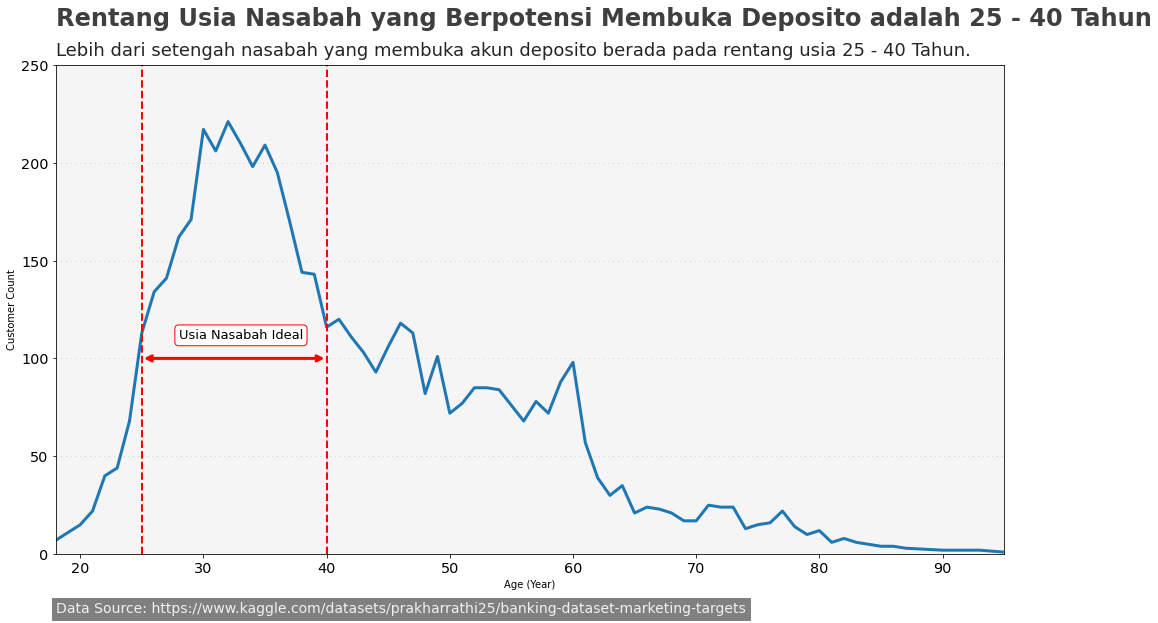

In [38]:
df_plot = df_yes.groupby('age').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='age', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Age (Year)')
plt.axvline(x=25, linewidth=2, color='red', linestyle='--')
plt.axvline(x=40, linewidth=2, color='red', linestyle='--')
plt.xlim(18, 95)
plt.ylim(0, 250)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 18, y = 270, s = "Rentang Usia Nasabah yang Berpotensi Membuka Deposito adalah 25 - 40 Tahun",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 18, y = 255,
               s = 'Lebih dari setengah nasabah yang membuka akun deposito berada pada rentang usia 25 - 40 Tahun.',
              fontsize = 18, alpha = .85)
plt.text(x = 18, y = -30,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(25, 100),
                xytext =(40, 100), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 28, y = 110,
    s = 'Usia Nasabah Ideal',fontsize = 13, bbox = dict(boxstyle ="round", fc ="1", color='r'))
#plt.savefig('bizinsight3.png')
plt.show()